In [1]:
import warnings
warnings.filterwarnings("ignore", message="Wswiglal-redir-stdio")

from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import numpy as np
import sxs

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
/Users/kanchansoni/anaconda3/envs/testenv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
print (sxs.__version__)

2025.0.17


In [3]:
m1 = 31.0
m2 = 20.5 

mtot = m1 + m2
# sxsid = "SXS:BBH:0083"

# non-spinning waveform 
nonspin_sxsid = "SXS:BBH:3984"

# aligned-spin waveform
align_sxsid = "SXS:BBH:1415"

# precessing waveform 
precess_sxsid = "SXS:BBH:0339"

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.
/Users/kanchansoni/anaconda3/envs/testenv/lib/python3.11/site-packages/waveformtools
/Users/kanchansoni/anaconda3/envs/testenv/lib/python3.11/site-packages/spectools


/Users/kanchansoni/anaconda3/envs/testenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 485/485 [00:00<00:00, 1.85MB/s]


100%|██████████| 3.47M/3.47M [00:00<00:00, 4.68MB/s]


Omega_ref 0.015938102761725817
Omegahats [-1.96530049e-06 -4.90514696e-07  1.00000000e+00] [1.29514486e-06 3.39816778e-07 1.00000000e+00]
Lhat [-6.26210605e-09  8.38576497e-09  1.00000000e+00], Omegahat: [-1.96530049e-06 -4.90514696e-07  1.00000000e+00]
nhat [-9.73031362e-01 -2.30672860e-01 -5.52828528e-09]
Omega_ref 0.023907154142588722
Omegahats [3.04444432e-06 2.32688335e-06 1.00000000e+00] [-2.02322855e-06 -1.55542093e-06  1.00000000e+00]
Lhat [ 3.65228583e-10 -5.14629277e-09  1.00000000e+00], Omegahat: [3.04444432e-06 2.32688335e-06 1.00000000e+00]
nhat [8.02694623e-01 5.96390261e-01 1.47389496e-11]
Omega_ref 0.031876205523451634
Omegahats [-3.17396822e-06 -3.70385721e-06  1.00000000e+00] [2.08867545e-06 2.48718065e-06 1.00000000e+00]
Lhat [-9.82872980e-09  1.84017769e-08  1.00000000e+00], Omegahat: [-3.17396822e-06 -3.70385721e-06  1.00000000e+00]
nhat [-6.62512479e-01 -7.49050876e-01  3.87304088e-09]


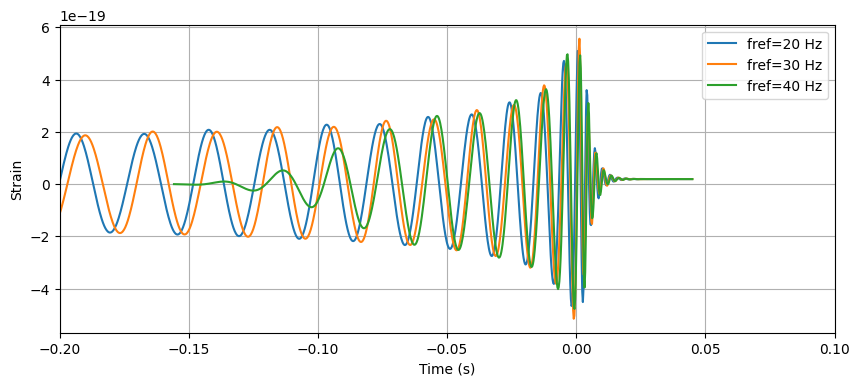

In [4]:
plt.figure(figsize=(10, 4))
for flow in [20, 30, 40]:
    f_lower = flow 
    f_ref = f_lower
    hp, hc = get_td_waveform(approximant='nrsxs',
                                    mtotal=mtot,
                                    delta_t=1/4096,
                                    f_lower=f_lower,
                                    f_ref=f_ref,
                                    inclination=np.pi/6,
                                    coa_phase=np.pi/4,
                                    distance=1,
                                    sxs_id=nonspin_sxsid)

    plt.plot(hp.sample_times, hp, label=f'fref={f_ref} Hz')

plt.xlabel('Time (s)')
plt.ylabel('Strain') 
plt.xlim([-0.2,0.1])
plt.legend()
plt.grid()
plt.show()

In [5]:
import sxstools
sxstools.__version__

'2025.06.17.2'

Omega_ref 0.015938102761725817
Omegahats [ 3.17723618e-05 -1.75585041e-04  9.99999984e-01] [-1.75982784e-05  9.60583342e-05  9.99999995e-01]
Lhat [-1.64114690e-07  1.37872943e-07  1.00000000e+00], Omegahat: [ 3.17723618e-05 -1.75585041e-04  9.99999984e-01]
nhat [ 1.71461529e-01 -9.85190816e-01 -5.21723958e-09]
Omega_ref 0.023907154142588722
Omegahats [-8.18575088e-05  1.72539498e-04  9.99999982e-01] [ 6.97985740e-05 -1.44999300e-04  9.99999987e-01]
Lhat [ 5.94130946e-07 -1.07227927e-07  1.00000000e+00], Omegahat: [-8.18575088e-05  1.72539498e-04  9.99999982e-01]
nhat [-4.20438393e-01  9.07321088e-01  6.97215228e-08]
Omega_ref 0.031876205523451634
Omegahats [-2.14784659e-04  1.11285927e-04  9.99999971e-01] [ 1.70452522e-04 -8.69472692e-05  9.99999982e-01]
Lhat [6.63781422e-07 4.17218753e-07 1.00000000e+00], Omegahat: [-2.14784659e-04  1.11285927e-04  9.99999971e-01]
nhat [-8.81279562e-01  4.72595317e-01  9.56130252e-08]


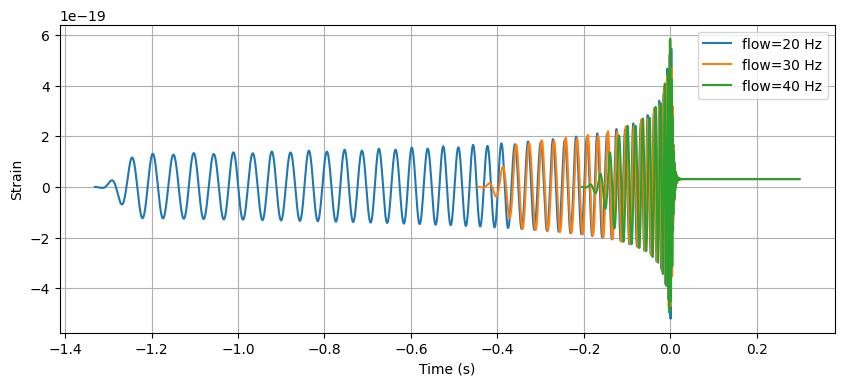

In [16]:
plt.figure(figsize=(10, 4))
for flow in [20, 30, 40]:
        
    f_lower = flow 
    f_ref = f_lower
    hp, hc = get_td_waveform(approximant='nrsxs',
                                    mtotal=mtot,
                                    delta_t=1/4096,
                                    f_lower=f_lower,
                                    f_ref=f_ref,
                                    inclination=np.pi/6,
                                    coa_phase=np.pi/4,
                                    distance=1,
                                    sxs_id=align_sxsid)

    plt.plot(hp.sample_times, hp, label=f'fref={f_ref} Hz')

# plt.savefig(f"aligned_spin_waveforms.png")
plt.xlabel('Time (s)')
plt.ylabel('Strain') 
plt.legend()
plt.grid()
plt.show()

Omega_ref 0.015938102761725817
Omegahats [ 0.02937811 -0.01579321  0.9994436 ] [ 0.02749673 -0.00991262  0.99957274]
Lhat [ 0.02804303 -0.01211676  0.99953328], Omegahat: [ 0.02937811 -0.01579321  0.9994436 ]
nhat [-0.39223958  0.91959624  0.02215538]
Omega_ref 0.023907154142588722
Omegahats [-0.02353404  0.47696265  0.87860843] [-0.02228173  0.46914154  0.88284185]
Lhat [-0.02268691  0.47192294  0.88134785], Omegahat: [-0.02353404  0.47696265  0.87860843]
nhat [-0.83321871 -0.49611894  0.24415689]
Omega_ref 0.031876205523451634
Omegahats [-0.20576906  0.11856238  0.97139181] [-0.20069858  0.12823781  0.97122353]
Lhat [-0.20257593  0.12465644  0.97130004], Omegahat: [-0.20576906  0.11856238  0.97139181]
nhat [-0.53930582  0.81370471 -0.21687295]


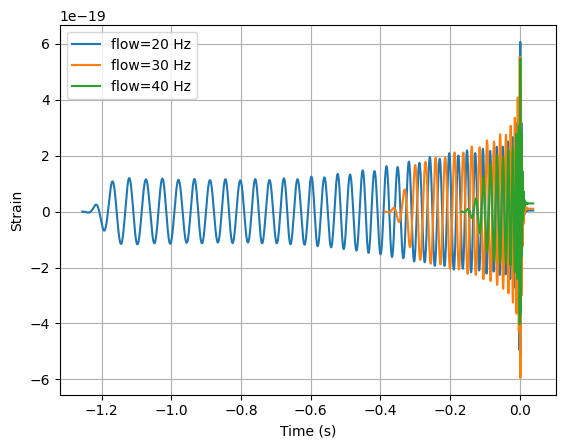

In [13]:
for flow in [20, 30, 40]:
    
    f_lower = flow 
    f_ref = f_lower
    hp, hc = get_td_waveform(approximant='nrsxs',
                                    mtotal=mtot,
                                    delta_t=1/4096,
                                    f_lower=f_lower,
                                    f_ref=f_ref,
                                    inclination=np.pi/6,
                                    coa_phase=np.pi/4,
                                    distance=1,
                                    sxs_id=precess_sxsid)

    plt.plot(hp.sample_times, hp, label=f'fref={f_ref} Hz')

# plt.savefig(f"aligned_spin_waveforms.png")
plt.xlabel('Time (s)')
plt.ylabel('Strain') 
plt.legend()
plt.grid()
plt.show()